### This is Homework 1 of DSCI 552 Machine Learning.
### KNN Classification
#### Sep 8th 2022
#### William Lu
#### Github Username: WilliamLu1999
#### USC ID: 7424831487

In [1]:
# Set Up
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy.io.arff import loadarff 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

##### 1(a) Check the dataset

In [2]:
# Load the dataset
raw_data = loadarff('../data/vertebral_column_data/column_2C_weka.arff')
# absolute path is :/Users/William/Downloads/homework-1-WilliamLu1999/data/vertebral_column_data/column_2C_weka.arff
df = pd.DataFrame(raw_data[0])
#le = preprocessing.LabelEncoder() # using label encoder to transform Y to numerical value
#df['class'].replace(to_replace=["b'Normal'","b'Abnormal'"], value=[0,1],inplace=True)

#new_label = {"class": {"b'Abnormal'": 1, "b'Normal'": 0}}
#df['class'].replace(new_label)
#df.loc[df['class'] == "b'Normal'", 'classs'] = 0

df['class'] = df['class'].astype('string')

df['class label'] = df['class'].apply(lambda x: 1 if x == "b'Abnormal'" else 0)
#result = df.dtypes
#print(result)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal',1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal',1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal',1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal',1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal',1
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal',0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal',0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal',0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal',0


In [3]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class label
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


In [4]:
df.loc[df['class label']==1]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal',1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal',1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal',1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal',1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal',1
...,...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,b'Abnormal',1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,b'Abnormal',1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,b'Abnormal',1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,b'Abnormal',1


##### 1(b)(i) Creating plots to see relationships between features

Text(0.5, 1.05, 'Relationship Between Independent Variables')

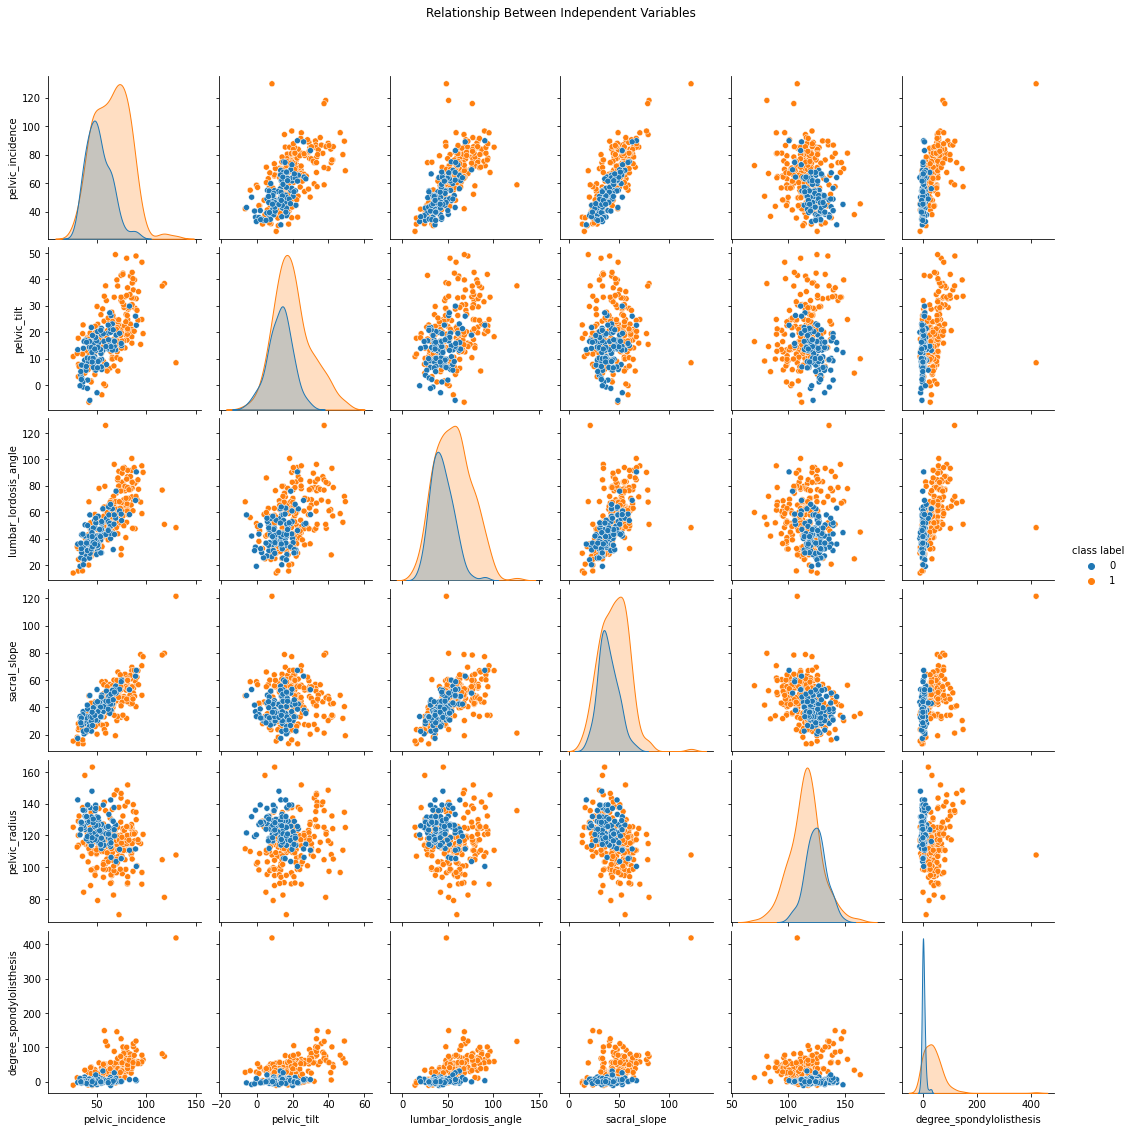

In [5]:
ind_pair =sns.pairplot(df,vars=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
                      'degree_spondylolisthesis'],hue='class label')
ind_pair.fig.suptitle('Relationship Between Independent Variables',y=1.05)

##### 1(b)(ii)

[Text(0.5, 1.0, 'Pelvic Incidence Distribution')]

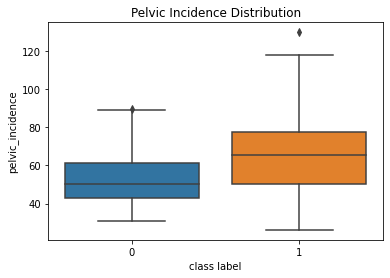

In [6]:
sns.boxplot(data=df,x='class label',y='pelvic_incidence').set(title='Pelvic Incidence Distribution')

[Text(0.5, 1.0, 'Pelvic Tilt Distribution')]

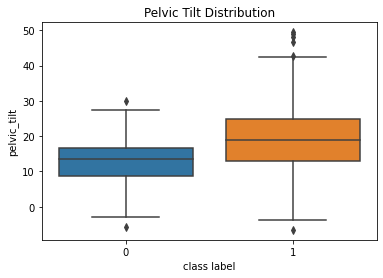

In [7]:
sns.boxplot(data=df,x='class label',y='pelvic_tilt').set(title='Pelvic Tilt Distribution')

[Text(0.5, 1.0, 'Sacral Slope Distribution')]

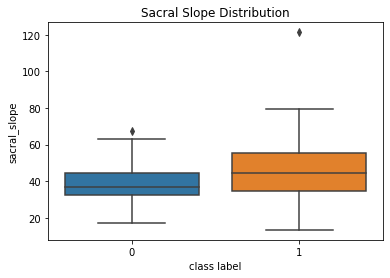

In [8]:
sns.boxplot(data=df,x='class label',y='sacral_slope').set(title='Sacral Slope Distribution')

[Text(0.5, 1.0, 'Lumbar Lordosis Angle Distribution')]

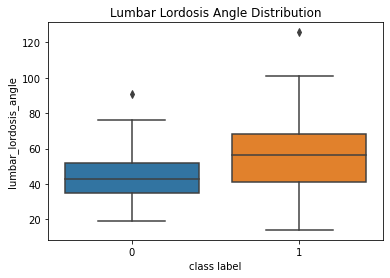

In [9]:
sns.boxplot(data=df,x='class label',y='lumbar_lordosis_angle').set(title='Lumbar Lordosis Angle Distribution')

[Text(0.5, 1.0, 'Pelvic Radius Distribution')]

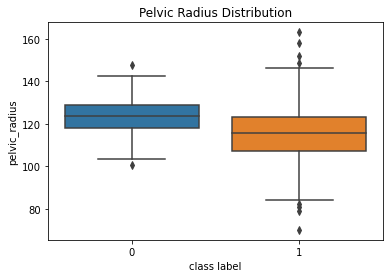

In [10]:
sns.boxplot(data=df,x='class label',y='pelvic_radius').set(title='Pelvic Radius Distribution')

[Text(0.5, 1.0, 'Degree Spondylolisthesis Distribution')]

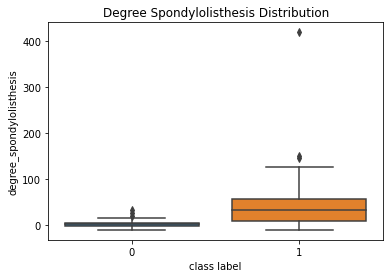

In [11]:
sns.boxplot(data=df,x='class label',y='degree_spondylolisthesis').set(title='Degree Spondylolisthesis Distribution')

##### b(iii)

In [12]:
x1 = df.iloc[0:140,0:6] # 140 rows of class 1
x2 = df.iloc[210:280,0:6] # 70 rows of class 0
X_train=pd.concat([x1, x2], ignore_index=True) # specifying the exact training data of input X
y1= df.iloc[0:140,7] # the seventh column is the column label numeric value
y2 = df.iloc[210:280,7]
y_train=pd.concat([y1,y2],ignore_index=True) # specifying the exact training data of outcome Y

In [13]:
x3 = df.iloc[140:210,0:6]
x4 = df.iloc[280:,0:6]
X_test=pd.concat([x3,x4],ignore_index=True) # getting the test data
y3 = df.iloc[140:210,7]
y4 = df.iloc[280:,7]
y_test=pd.concat([y3,y4],ignore_index=True)


##### c(i) and (ii) Classification using KNN

In [14]:
# Feature Scaling
# Since our algorithm computes distance, we need to scale our features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
# Define the model
# using the softeware package
test_error=[]
train_error=[]
for i in range (208,0,-3):
    classifier = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_predict =classifier.predict(X_test)
    # finding the test error
    test_error.append(1-accuracy_score(y_test, y_predict))
    # finding the training error. Need to pass in the training data again
    y_train_predict=classifier.predict(X_train)
    #train_error.append(1-accuracy_score(y_train,y_train_predict))
    train_error.append(np.mean(y_train_predict != y_train)) # same thing
#print(len(test_error))   
#print(len(train_error))  

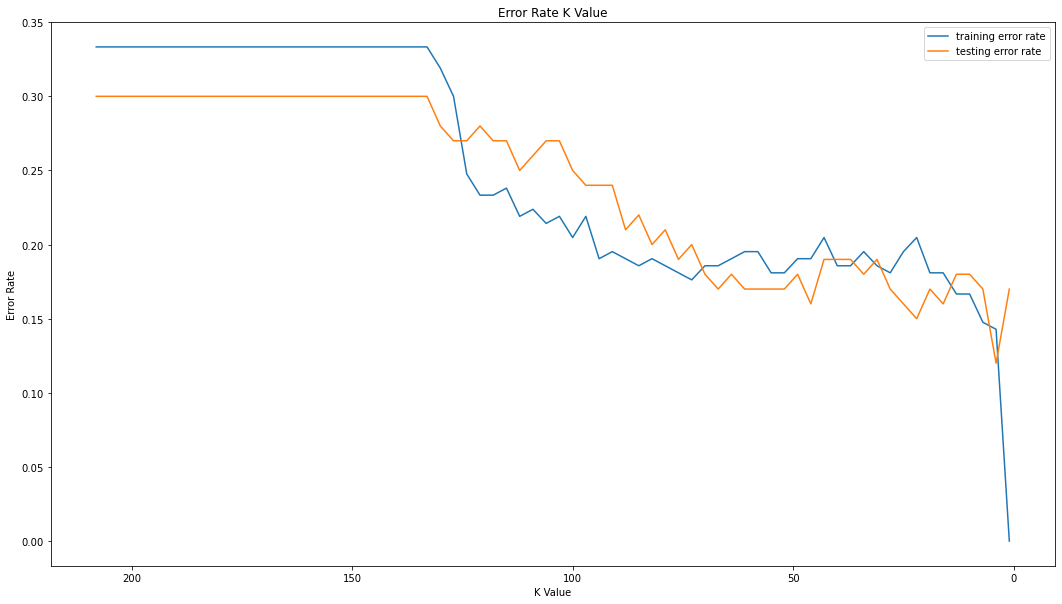

In [16]:
# plot the training and testing error
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
K_arr = [i for i in range (208,0,-3)]
plt.plot(K_arr,train_error,label = "training error rate")
plt.plot(K_arr,test_error,label = "testing error rate")
plt.gca().invert_xaxis()
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

In [17]:
print(min(train_error))

0.0


In [18]:
# finding the most suitable k*
min_test_error_index=test_error.index(min(test_error))
print("The index of best K* and the testing error is: ",min_test_error_index) # this gives us 68
K_star = K_arr[68]
print("K* is: ",K_star) # this gives us 4
# Do K=4 
best_classifier = KNeighborsClassifier(n_neighbors=K_star,p=2,metric='euclidean')
best_classifier.fit(X_train,y_train)
best_y_predict =classifier.predict(X_test)
cm = confusion_matrix(y_test,best_y_predict)
cm

The index of best K* and the testing error is:  68
K* is:  4


array([[18, 12],
       [ 5, 65]])

In [19]:
print(f1_score(y_test,best_y_predict)) # f1 score

0.8843537414965986


In [20]:
TP = 18
FP = 5
TN = 65
FN = 12
precision = TP/(TP+FP)
true_positive_rate = TP/(TP+FN)
true_negative_rate = TN/(TN+FP)
print("Precision rate is: ", precision)
print("True Positive rate is: ",true_positive_rate)
print("True Negative rate is: ",true_negative_rate)

Precision rate is:  0.782608695652174
True Positive rate is:  0.6
True Negative rate is:  0.9285714285714286


In [21]:
y_test

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: class label, Length: 100, dtype: int64

##### c(iii) Plot the Learning Curve

In [22]:
# Plot the Learning Curve
# We need to loop through N and find the right K for each size of N
import math
N =[i for i in range (10,220,10)] # from 10 to 210 size of training
k =[j for j in range (1,201,5)] # from 1 to 196 
errors=[] # will store in here later
# For each N, the number of rows for Class 0 and Class 1 will change accordingly
for n in N:
    x_n_1 = df.iloc[0:n-math.floor(n/3),0:6] # subset of Class 1
    x_n_0 = df.iloc[210:210+math.floor(n/3),0:6] # subset of Class 0
    x_n_train = pd.concat([x_n_1,x_n_0],ignore_index=True) # the combined x training data
    # getting the corresponding y training
    y_n_1 = df.iloc[0:n-math.floor(n/3),7]
    y_n_0 = df.iloc[210:210+math.floor(n/3),7]
    y_n_train = pd.concat([y_n_1,y_n_0],ignore_index=True) # the combined y training data
    # scale the x!
    sc_x_n = StandardScaler()
    x_n_train = sc_x_n.fit_transform(x_n_train)
    # testing data is still the same
    # pass in different k now
    test_error_n=[]
    for j in k:
        # Make sure the size of training data >= number of neighbors
        if (j<=n):
            #print(j)
            classifier_n = KNeighborsClassifier(n_neighbors=j,p=2,metric='euclidean')
            classifier_n.fit(x_n_train,y_n_train)
            y_predict_n =classifier_n.predict(X_test)
            test_error_n.append(1-accuracy_score(y_test, y_predict_n))
            #print(test_error_n)
        else:
            # skip when number of neighbors is bigger than training set
            continue
        #print(test_error_n)
    errors.append((test_error_n))

    

In [23]:
errors

[[0.39, 0.31000000000000005],
 [0.42000000000000004,
  0.31999999999999995,
  0.30000000000000004,
  0.30000000000000004],
 [0.35,
  0.41000000000000003,
  0.36,
  0.31000000000000005,
  0.30000000000000004,
  0.30000000000000004],
 [0.32999999999999996,
  0.4,
  0.32999999999999996,
  0.32999999999999996,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004],
 [0.42000000000000004,
  0.37,
  0.30000000000000004,
  0.31000000000000005,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004],
 [0.49,
  0.47,
  0.36,
  0.36,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004,
  0.30000000000000004],
 [0.51,
  0.5,
  0.36,
  0.35,
  0.31999999999999995,
  0.30000000000000004,
  0.31000000000000005,
  0.30000000000000004,
  0.30000000000000004,
  0.3000000000000000

In [24]:
best_error=[]
for error in errors:
    best_error.append(min(error))
print(best_error.index(min(best_error))) # gives the index of the size of the training set 20. In other words, 210 trainig samples.
print(best_error)

20
[0.31000000000000005, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.28, 0.24, 0.26, 0.22999999999999998, 0.18000000000000005, 0.18000000000000005, 0.17000000000000004, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002]


In [25]:
# find the K for the lowest test error
k_eu_index=errors[20].index(min(errors[20])) # this gives the index of the best k for euclidean, not the best k
print("The best error rate for euclidean distance when p is equal to 2 is: ",min(best_error))
print("The best k for euclidean distance when p is equal to 2 is: ",k[5])

The best error rate for euclidean distance when p is equal to 2 is:  0.15000000000000002
The best k for euclidean distance when p is equal to 2 is:  26


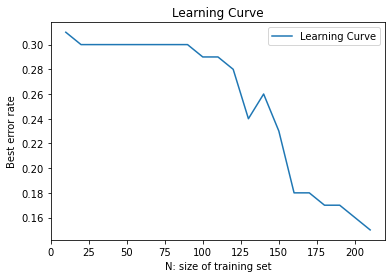

In [26]:
# now we can draw the graph with corresponding N
plt.plot(N,best_error,label='Learning Curve')
plt.title('Learning Curve')
plt.xlabel('N: size of training set')
plt.ylabel('Best error rate')
plt.legend()
plt.show()

##### d(i) A KNN with Manhattan Distance

In [27]:
test_error_man=[] # store the test error using Manhattan Distance
kd =[h for h in range(1,205,5)]
for i in range (1,201,5):
    classifier_man = KNeighborsClassifier(n_neighbors=i,p=1,metric='manhattan')
    classifier_man.fit(X_train,y_train)
    y_predict_man =classifier_man.predict(X_test)
    # finding the test error
    test_error_man.append(1-accuracy_score(y_test, y_predict_man))
print("The test error when using Manhattan Distance with p equal to 1 is: ",
      min(test_error_man))
print("The index of the best K is: ", test_error_man.index(min(test_error_man))) # gives the index

The test error when using Manhattan Distance with p equal to 1 is:  0.14
The index of the best K is:  1


In [28]:
# since the index of the minimum testing error when using Manhattan distance is 1 , k is 6.
best_k_man = kd[1]
print("The optimal K when using mahanttan distance is: ",best_k_man)

The optimal K when using mahanttan distance is:  6


##### d(i) B KNN with log_10 P Distance

In [29]:
pp = [10**i for i in np.arange (0.1,1.1,0.1)] # floating number in for loop needs numpy
print(pp) # compute p from log_10 p = {0.1....1}

[1.2589254117941673, 1.5848931924611136, 1.9952623149688797, 2.51188643150958, 3.1622776601683795, 3.9810717055349722, 5.011872336272724, 6.309573444801933, 7.943282347242816, 10.0]


In [30]:
test_error_p=[]
for t in pp:
    classifier_p = KNeighborsClassifier(n_neighbors=6,p=t)
    classifier_p.fit(X_train,y_train)
    y_predict_p = classifier_p.predict(X_test)
    # Find the test error
    test_error_p.append(1-accuracy_score(y_test,y_predict_p))
print(test_error_p)

[0.17000000000000004, 0.18000000000000005, 0.17000000000000004, 0.16000000000000003, 0.18000000000000005, 0.18000000000000005, 0.17000000000000004, 0.18000000000000005, 0.18000000000000005, 0.17000000000000004]


In [31]:
# the best log_10 P would be the one with the smallest error value
best_p_index = test_error_p.index(min(test_error_p))
print("The best error rate of the best log_10 p or p is: ",min(test_error_p))
print("The index of the best log_10 p or p is: ", best_p_index)
print("So the best p is: ", pp[best_p_index]) # this is the best p 'value'
best_log_p = np.log10(pp[3])
print("So the best log_10 p is: ",best_log_p)

The best error rate of the best log_10 p or p is:  0.16000000000000003
The index of the best log_10 p or p is:  3
So the best p is:  2.51188643150958
So the best log_10 p is:  0.4


##### d(i) C KNN with Chebyshev Distance

In [32]:
# Chebyshev distance with p -> infinity
test_error_cheby=[]
for a in kd: #kd is the k {1,6,11,....196}
    classifier_cheby = KNeighborsClassifier(n_neighbors=a,p=math.inf,metric='chebyshev')
    classifier_cheby.fit(X_train,y_train)
    y_predict_cheby = classifier_cheby.predict(X_test)
    # Find the test error
    test_error_cheby.append(1-accuracy_score(y_test,y_predict_cheby))
print("The minimum test error when using Chebyshev Distance with p equal to infinity is: ",
      min(test_error_cheby))
print("The index of the best K is: ",test_error_cheby.index(min(test_error_cheby))) # gives the index

The minimum test error when using Chebyshev Distance with p equal to infinity is:  0.15000000000000002
The index of the best K is:  0


In [33]:
# since index is 0, the best k for chebyshev is 1
k_cheby =kd[0] 
print("The best K when using chebyshev distance is: ",k_cheby)

The best K when using chebyshev distance is:  1


##### d(ii) KNN with Mahalanobis Distance

In [34]:
from sklearn.neighbors import DistanceMetric

In [35]:
# Mahalanobis Distance
test_error_mah=[]
for a in kd: # this is the k {1,6,...196}
    clasifier_mah = KNeighborsClassifier(n_neighbors=a,algorithm='brute',metric='mahalanobis',
    metric_params={'VI': np.cov(np.linalg.inv(np.cov(X_train.T)),rowvar=False) })
    clasifier_mah.fit(X_train,y_train)
    y_pred_mah = clasifier_mah.predict(X_test)
    # finding the test error
    test_error_mah.append(1-accuracy_score(y_test,y_pred_mah))
                          
print("The test error when using Mahalanobis Distance with V and V1 is: ", min(test_error_mah))
print("The index of the best K is: ", test_error_mah.index(min(test_error_mah))) # gives the index
print("The optimal K is then: ",kd[test_error_mah.index(min(test_error_mah))])

The test error when using Mahalanobis Distance with V and V1 is:  0.28
The index of the best K is:  14
The optimal K is then:  71


Create the summary dataframe of K and test error for differenr distance

In [36]:
summary_stats ={"Distance":["Euclidean","Manhattan","log_10^P= 0.4","Chebyshev","Mahalanobis"],
                "Optimal K":[26,6,6,1,11],
                "Test Error":[0.15000000000000002,0.14,0.16000000000000003,0.15000000000000002,0.29000000000000004],
               }
summary_df =pd.DataFrame(data=summary_stats)
#summary_df.set_index([pd.Index(["Euclidean","Manhattan","log_10 P=0.4","Chebyshev","Mahalanobis"])])
print(summary_df)

        Distance  Optimal K  Test Error
0      Euclidean         26        0.15
1      Manhattan          6        0.14
2  log_10^P= 0.4          6        0.16
3      Chebyshev          1        0.15
4    Mahalanobis         11        0.29


##### e Weighted  Decision instead of Majority Polling

In [37]:
test_error_man2=[] # store the test error using Manhattan Distance
for a in kd: # this is the k {1,6,11,...196}
    classifier_man2 = KNeighborsClassifier(n_neighbors=a,p=1,weights='distance',metric='manhattan')
    classifier_man2.fit(X_train,y_train)
    y_predict_man2 =classifier_man2.predict(X_test)
    # finding the test error
    test_error_man2.append(1-accuracy_score(y_test, y_predict_man2))
print("The test error when using weighted Manhattan Distance with p equal to 1 is: ",
      min(test_error_man2))

print("The index of the best K is: ", test_error_man2.index(min(test_error_man2))) # gives the index
print("The optimal K is then: ",kd[test_error_man2.index(min(test_error_man2))])

The test error when using weighted Manhattan Distance with p equal to 1 is:  0.15000000000000002
The index of the best K is:  1
The optimal K is then:  6


In [38]:
test_error_eu2=[] # store the test error using Euclidean Distance
for a in kd: # this is the k {1,6,11,...196}
    classifier_eu2 = KNeighborsClassifier(n_neighbors=a,p=2,weights='distance',metric='euclidean')
    classifier_eu2.fit(X_train,y_train)
    y_predict_eu2 =classifier_eu2.predict(X_test)
    # finding the test error
    test_error_eu2.append(1-accuracy_score(y_test, y_predict_eu2))
print("The test error when using weighted Euclidean Distance with p equal to 2 is: ",
      min(test_error_eu2))
print("The index of the best K is: ", test_error_eu2.index(min(test_error_eu2))) # gives the index
print("The optimal K is then: ",kd[test_error_eu2.index(min(test_error_eu2))])

The test error when using weighted Euclidean Distance with p equal to 2 is:  0.15000000000000002
The index of the best K is:  4
The optimal K is then:  21


In [39]:
test_error_cheb2=[] # store the test error using Chebyshev Distance
for a in kd:
    classifier_cheb2 = KNeighborsClassifier(n_neighbors=a,p=math.inf,weights='distance',metric='chebyshev')
    classifier_cheb2.fit(X_train,y_train)
    y_predict_cheb2 =classifier_cheb2.predict(X_test)
    # finding the test error
    test_error_cheb2.append(1-accuracy_score(y_test, y_predict_cheb2))
print("The test error when using weighted Chebyshev Distance with p equal to infinity is: ",
      min(test_error_cheb2))
print("The index of the best K is: ", test_error_cheb2.index(min(test_error_cheb2))) # gives the index
print("The optimal K is then: ",kd[test_error_cheb2.index(min(test_error_cheb2))])

The test error when using weighted Chebyshev Distance with p equal to infinity is:  0.15000000000000002
The index of the best K is:  0
The optimal K is then:  1


##### f What's the lowest training error rate among all versions of KNN above?

The lowest traininig error I got is 0 from c(ii). 